# Pathway optimization in metabolic engineering - example use case of the code base

In [1]:
import pandas as pd
from models.gan import GAN
from models.ppca import PPCA

from utils.distances import kl_div

from utils.visualizations import visualize_data, visualize_pca

Read and preprocess the data - remove index and production value

In [2]:
# Read the data
df = pd.read_csv("data/Continuous_Pathway_I_GAN_dataset.csv")
labels = df['Product_I'].values
# Remove the first (index) and last (label) column
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Product_I', axis=1)
data = df.values

## PPCA

First, we consider the baseline model - PPCA

In [3]:
# Set hyperparameters
latent_size = 8

In [4]:
# Train the model
ppca = PPCA(latent_size, data)

In [5]:
# Generate data
synthetic_data_ppca = ppca.generate(5000)

We use KL divergence in order to compare the simliarity of distributions of real and synthetic data

In [6]:
# Calculate KL divergence
kl_div(data, synthetic_data_ppca)

tensor(1.7076)

Visualize data in both real dimensions and PCA reduced dimensions (using first two principal components)

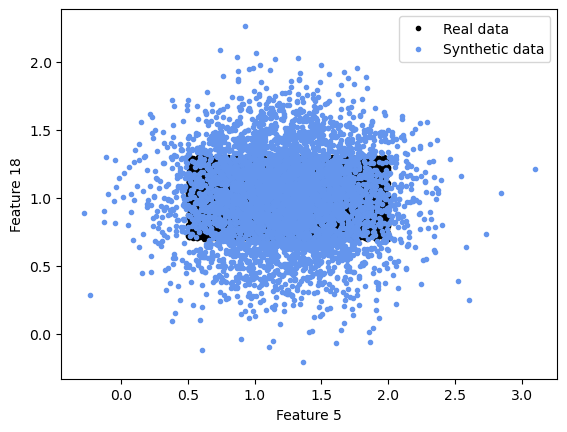

In [7]:
# Visualize data in original dimensions
visualize_data(data, synthetic_data_ppca, 5, 18, 'black', 'cornflowerblue')

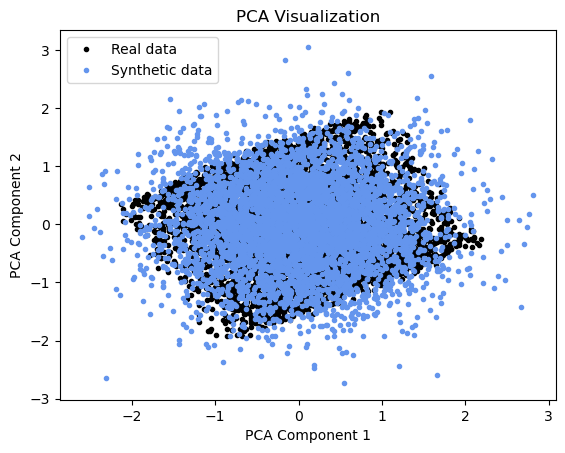

In [8]:
# Visualize data in PCA reduced dimensions
visualize_pca(data, synthetic_data_ppca, 'black', 'cornflowerblue')

## GAN

Similarly, we consider the GAN model

In [9]:
# Set hyperparameters
batch_size = 50
lr = 0.0001
epochs = 1
latent_size = 8

In [10]:
# Train the model
gan = GAN(latent_size, batch_size, lr, epochs, data)
gan.train()

In [11]:
# Generate data
synthetic_data_gan = gan.generate(5000)

In [12]:
# Calculate KL divergence
print(kl_div(data, synthetic_data_gan.detach()))

tensor(400.0265)


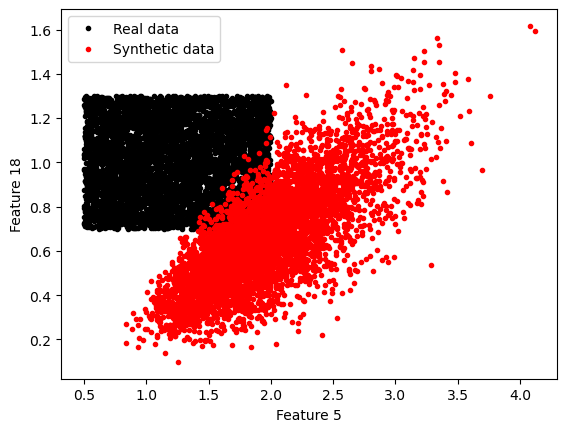

In [13]:
# Visualize data in original dimensions
visualize_data(data, synthetic_data_gan.detach(), 5, 18, 'black', 'red')

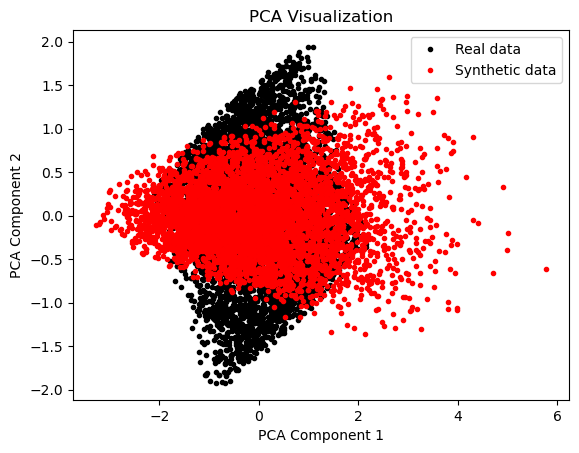

In [14]:
# Visualize data in PCA reduced dimensions
visualize_pca(data, synthetic_data_gan.detach(), 'black', 'red')